In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import vizualization

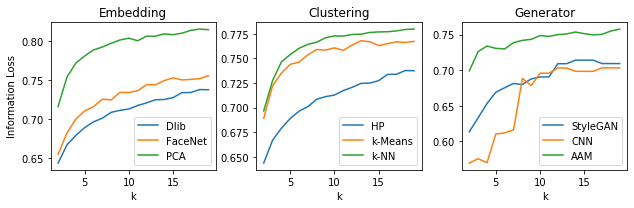

In [11]:
fig_il = pd.read_pickle('Outputs/IL_results.pickle')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
fig_il.plot(x='k',y=['hier_dlib_adjust','hier_facenet_adjust', 'hier_pca_adjust'], ax=ax1, legend=False)
ax1.legend(['Dlib','FaceNet', 'PCA'])
ax1.set_ylabel('Information Loss')
ax1.set_title('Embedding')

fig_il.plot(x='k',y=['hier_dlib_adjust','kmeans_dlib_adjust', 'knn_dlib_adjust'], ax=ax2, legend=False)
ax2.legend(['HP', 'k-Means', 'k-NN'])
ax2.set_title('Clustering')

fig_il.plot(x='k', y=['stylegan_rafd','cnn_rafd','aam_rafd'], ax=ax3, legend=False)
ax3.legend(['StyleGAN', 'CNN', 'AAM'])
ax3.set_title('Generator')
fig.tight_layout()
plt.show()

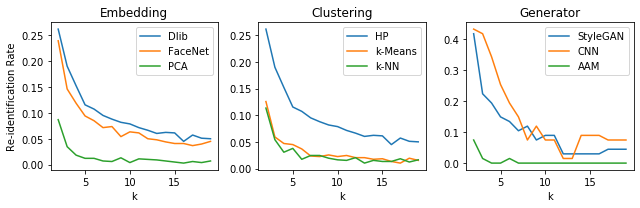

In [12]:
fig_ri = pd.read_pickle('Outputs/RI_results.pickle')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
fig_ri.plot(x = 'k', y=['hier_dlib_adjust','hier_facenet_adjust', 'hier_pca_adjust'], ax=ax1, legend=False)
ax1.legend(['Dlib','FaceNet', 'PCA'])
ax1.set_ylabel('Re-identification Rate')
ax1.set_title('Embedding')

fig_ri.plot(x='k',y=['hier_dlib_adjust','kmeans_dlib_adjust', 'knn_dlib_adjust'], ax=ax2, legend=False)
ax2.legend(['HP', 'k-Means', 'k-NN'])
ax2.set_title('Clustering')

fig_ri.plot(x='k',y=['stylegan_rafd','cnn_rafd','aam_rafd'], ax=ax3, legend=False)
ax3.legend(['StyleGAN', 'CNN', 'AAM'])
ax3.set_title('Generator')
fig.tight_layout()
plt.show()

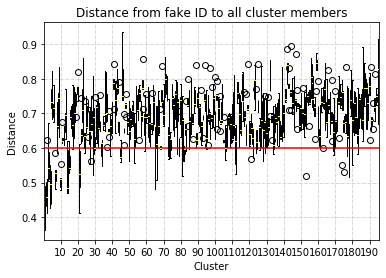

In [3]:
# Load results
pw_dists = pd.read_pickle('Outputs/pair_wise_dists_k5.pickle')
vizualization.show_boxplot_dist(pw_dists)

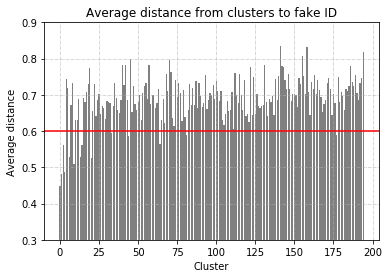

In [4]:
avg_dist = pd.read_pickle('Outputs/avg_per_cluster_k5.pickle')
vizualization.show_avg_dist(avg_dist['label'], avg_dist['avg_dist'])

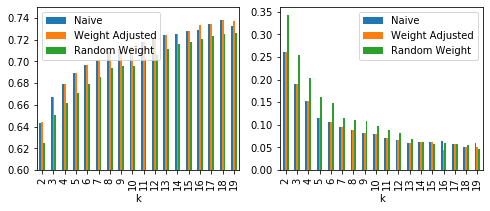

In [21]:
AnonFACES_ILs = pd.read_pickle('Outputs/AnonFACES_ILs.pickle')
AnonFACES_RIs = pd.read_pickle('Outputs/AnonFACES_RIs.pickle')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
AnonFACES_ILs.plot.bar(x='k',y=['Naive', 'Weight Adjusted', 'Random Weight'], ax=ax1)
ax1.set_ylim(0.6,0.75)

AnonFACES_RIs.plot.bar(x='k',y=['Naive', 'Weight Adjusted', 'Random Weight'], ax=ax2)

Text(0, 0.5, 'Re-identification Rate')

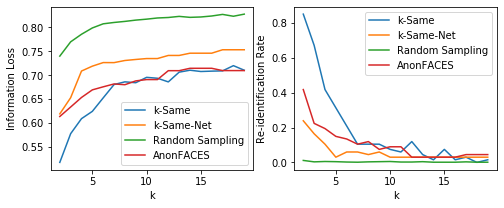

In [35]:
#load k-same
pickle_save_path = 'related_works/k-same/k_same_k20.pkl'
k_same = pd.read_pickle(pickle_save_path)

#load k-same-m
pickle_save_path = 'related_works/k-same-m/k_same_m_k20.pkl'
k_same_m = pd.read_pickle(pickle_save_path)

#load anonfaces
pickle_save_path = 'Outputs/com_anonfaces.pkl'
anon_faces = pd.read_pickle(pickle_save_path)

#load ksamenet
pickle_save_path = 'Outputs/com_ksamenet.pkl'
ksamenet = pd.read_pickle(pickle_save_path)

#load random clt
pickle_save_path = 'Outputs/random_clt.pkl'
random_clt = pd.read_pickle(pickle_save_path)



IL_df = pd.DataFrame({'k': range(2,20), 'k-Same': k_same['IL'], 'k-Same-M': k_same_m['IL'], 
                      'k-Same-Net':ksamenet['IL']/67,
                      'Random Sampling': random_clt['IL'],
                      'AnonFACES': anon_faces['IL']/67
                     })

RI_df = pd.DataFrame({'k': range(2,20), 'k-Same': k_same['FailProb'], 'k-Same-M': k_same_m['FailProb'], 
                      'k-Same-Net':ksamenet['FailProb'],
                      'Random Sampling': random_clt['FailProb'],
                      'AnonFACES': anon_faces['FailProb']
                     })
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
IL_df.plot(x='k',y=['k-Same', 'k-Same-Net', 'Random Sampling', 'AnonFACES'], ax=ax1)
ax1.set_ylabel('Information Loss')
RI_df.plot(x='k',y=['k-Same', 'k-Same-Net', 'Random Sampling', 'AnonFACES'], ax=ax2)
ax2.set_ylabel('Re-identification Rate')